In [51]:
import numpy as np
from astropy.io import fits
import lime 
import matplotlib.pyplot as plt

In [52]:
hdul = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_1D_f99_c00.fits', mode='update')
header = hdul[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header['FLUXSCAL'] = 1
header
    
hdul.flush()

In [53]:
print(header)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2234 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-03T21:09:20' / Date FITS file was generated                  IRAF-TLM= '2024-07-03T21:09:20' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.00463867188 / RA at R

In [54]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [55]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file1 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_1D_f99_c00.fits"

#load the data
wave1, flux1, hdr1 = import_1313_fits(fits_file1)

In [56]:
# Galaxy redshift and the flux normalization
# la misma para todos los slits
z_obj = 0.001568
normFlux = 1

In [57]:
spec1 = lime.Spectrum(wave1, flux1, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

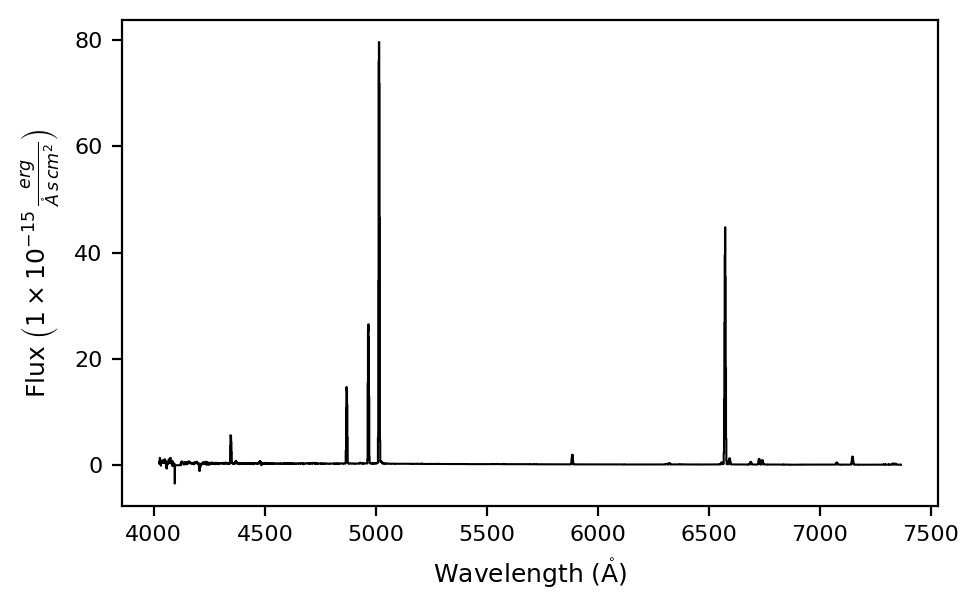

In [58]:
spec1.plot.spectrum(label='slit1_NGC1313')

In [59]:
# Line name, its location mask in the rest _frame and fit configuration
line1_Ha = 'H1_6563A_b'
band_edges1_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf1_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

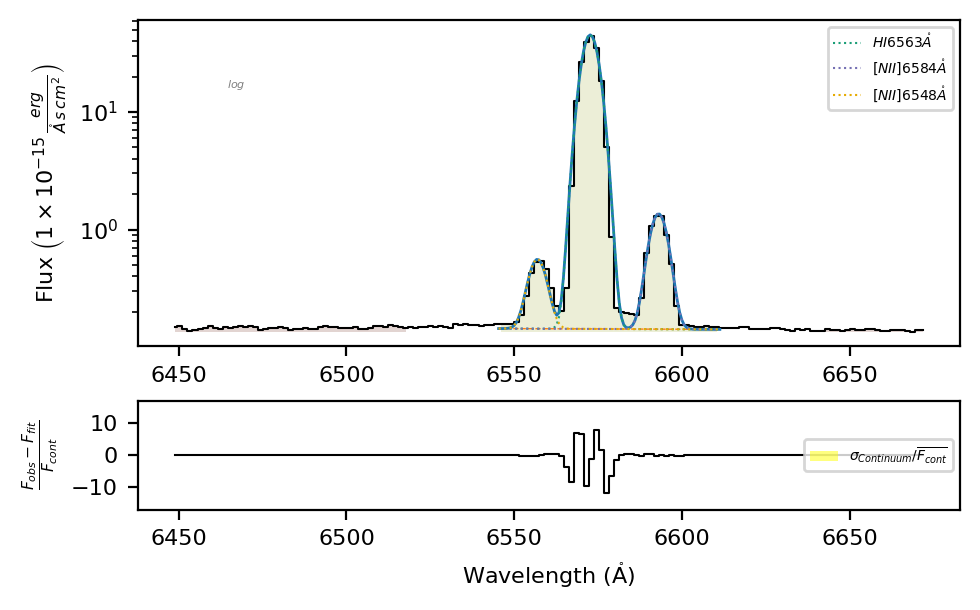

In [60]:
# New attempt including the fit configuration
spec1.fit.bands(line1_Ha, band_edges1_Ha, fit_conf=fit_conf1_Ha)
spec1.plot.bands()

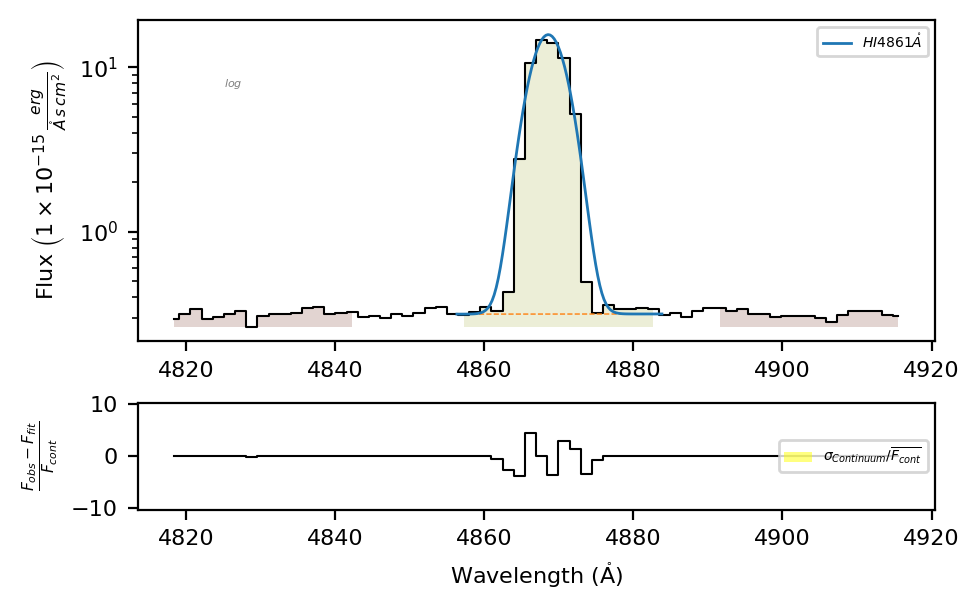

In [61]:
spec1.fit.bands('H1_4861A')
spec1.plot.bands()

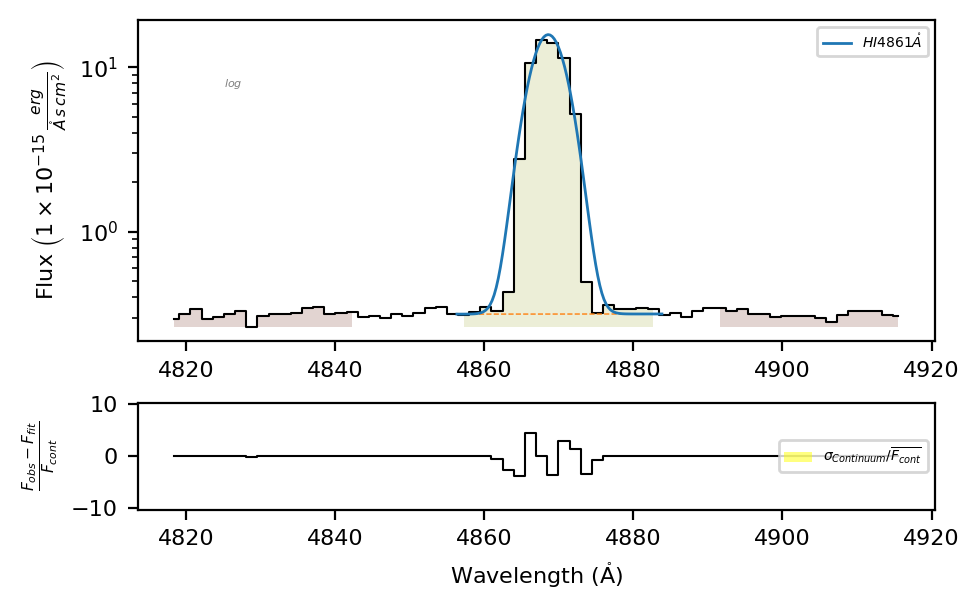

In [62]:
spec1.fit.bands(4861)
spec1.plot.bands()

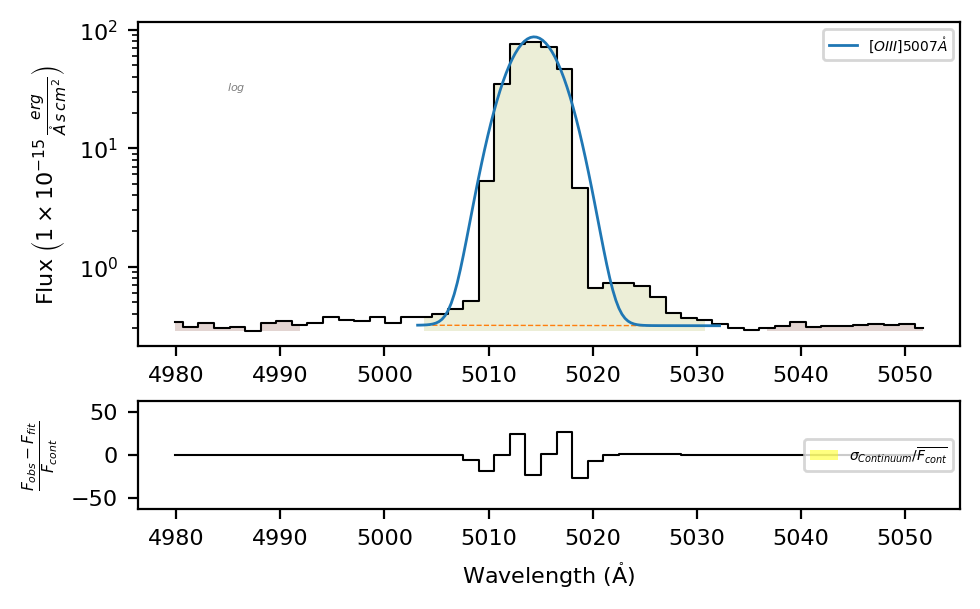

In [63]:
spec1.fit.bands('O3_5007A')
spec1.plot.bands()

In [99]:
#fit config for [OIII]
line1_O3 = 'O3_5007A_b'
fit_conf1_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.0'},
                'He1_5016A_amp':{'expr':'1.0'},
                'He1_5016A_center': {'min:5014,max:5018'}
                }

In [100]:
spec1.fit.bands(line1_O3, fit_conf=fit_conf1_O3)
spec1.plot.bands()

TypeError: 'set' object is not a mapping

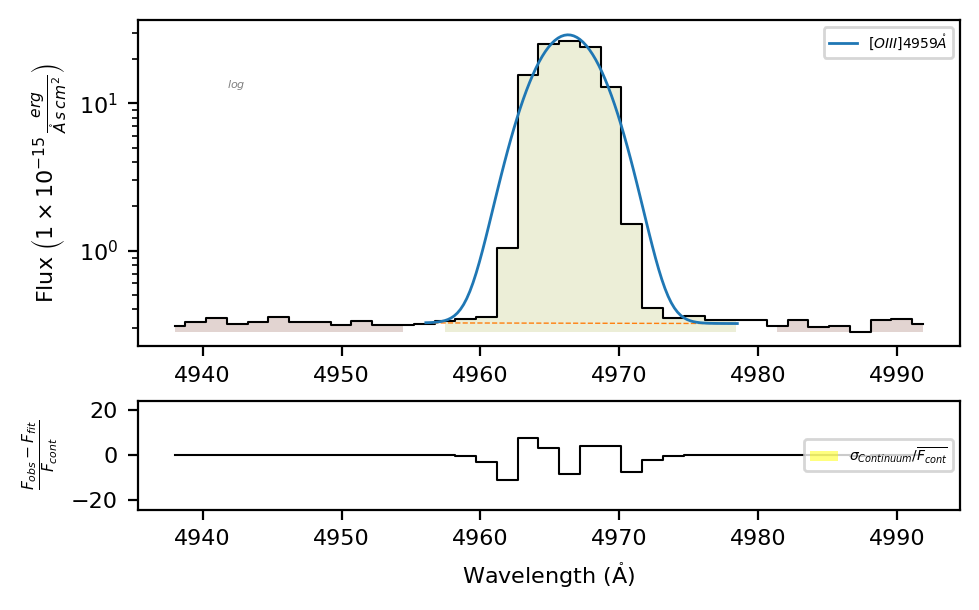

In [16]:
spec1.fit.bands(4959)
spec1.plot.bands()

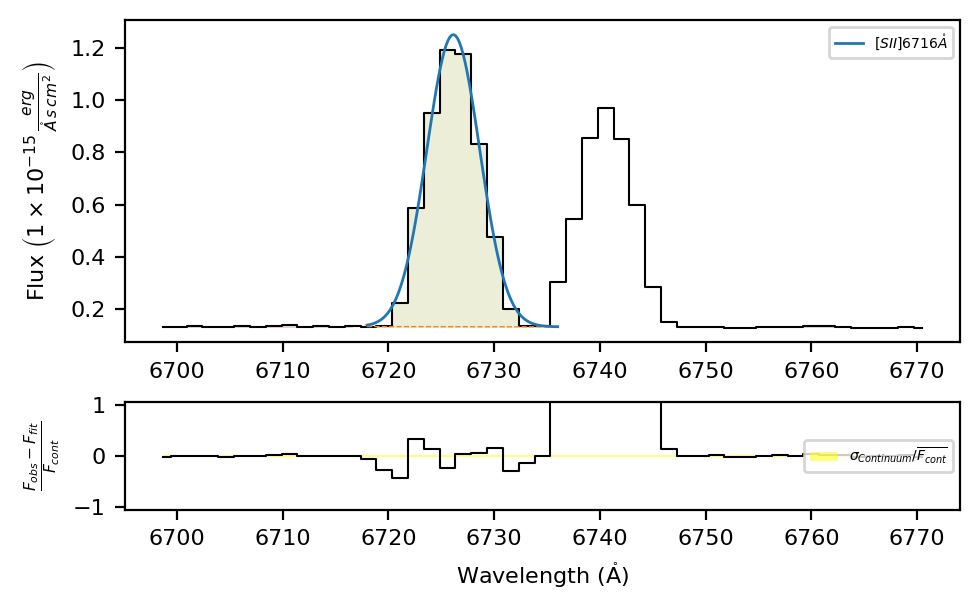

In [17]:
spec1.fit.bands(6716)
spec1.plot.bands()

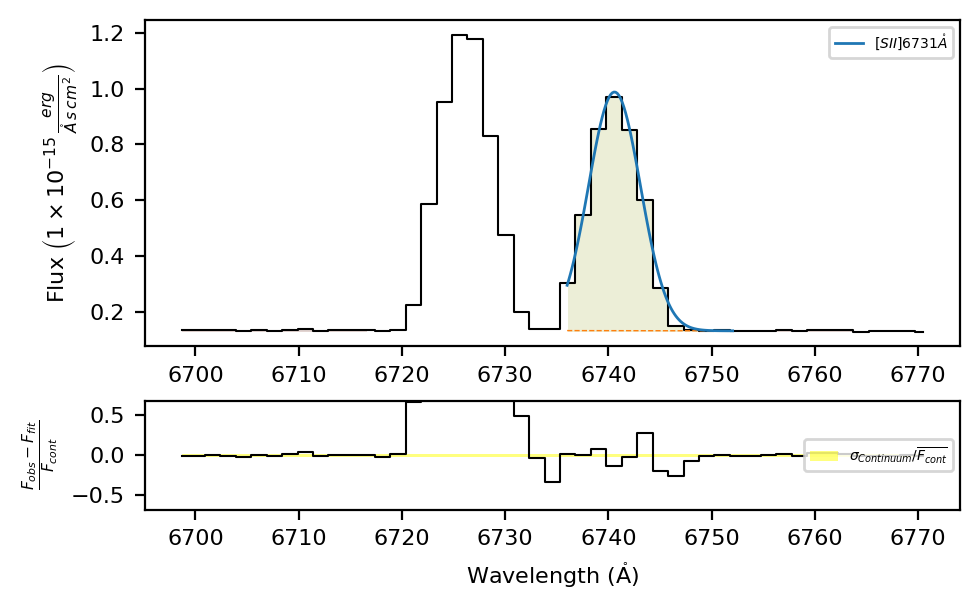

In [18]:
spec1.fit.bands(6731)
spec1.plot.bands()

In [42]:
# Line name, its location mask in the rest _frame and fit configuration
line1_S2 = 'S2_6716A_b'
band_edges1_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf1_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

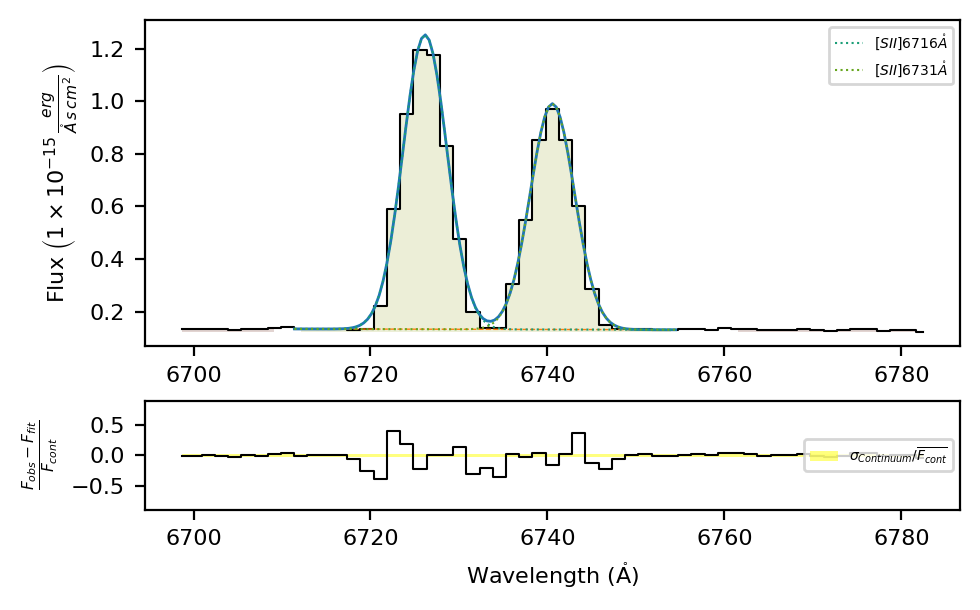

In [43]:
# New attempt including the fit configuration
spec1.fit.bands(line1_S2,band_edges1_S2, fit_conf=fit_conf1_S2)
spec1.plot.bands()

SLIT 3

In [44]:
hdul3 = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit3_1D_f99_c00.fits', mode='update')
header3 = hdul3[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header3['FLUXSCAL'] = 1
header3
    
hdul3.flush()

In [45]:
print(header3)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2225 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-03T21:09:20' / Date FITS file was generated                  IRAF-TLM= '2024-07-03T21:09:20' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.88818359375 / RA at R

In [46]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [47]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file3 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit3_1D_f99.fits"

#load the data
wave3, flux3, hdr3 = import_1313_fits(fits_file3)

In [48]:
spec3 = lime.Spectrum(wave3, flux3, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

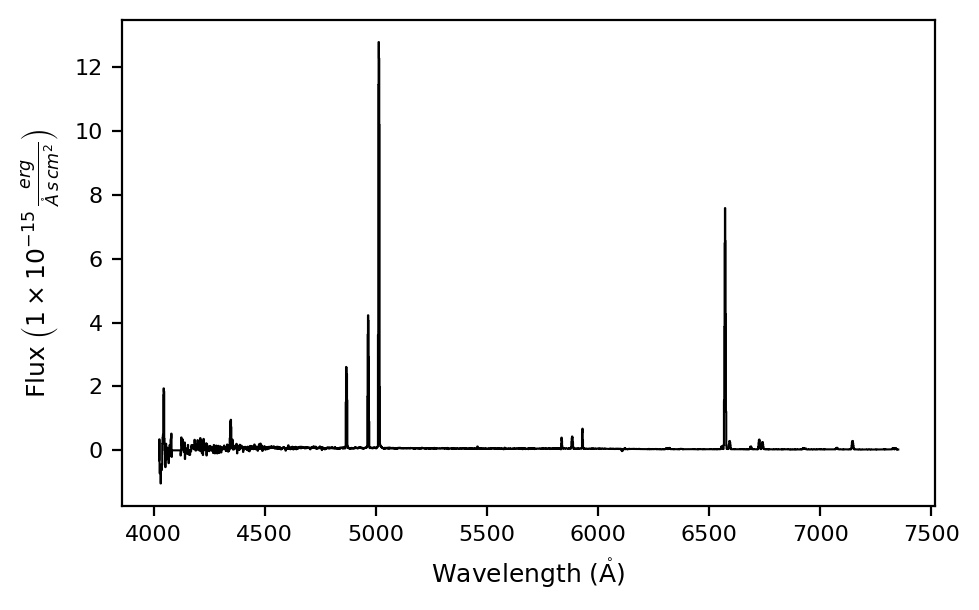

In [49]:
spec3.plot.spectrum(label='slit3_NGC1313')

In [50]:
# Line name, its location mask in the rest _frame and fit configuration
line3_Ha = 'H1_6563A_b'
band_edges3_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf3_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}